In [1]:
###CREATORS

#Alper Mert – 28266
#Çınar Kılcı- 27955
#Yunus Tan Kerestecioğlu -28168
#Yavuz Berke Barışcan- 26333

In [101]:
import pandas as pd
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# Load the CSV file
data = pd.read_csv('german_credit_data.csv')
data.columns = data.columns.str.strip()

In [102]:
# Identify columns with missing values
missing_columns = data.columns[data.isin(['NA']).any()]

# Replace "NA" values with actual missing values (NaN)
data.replace('NA', np.nan, inplace=True)
#data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
categorical_columns = data.select_dtypes(include='object').columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
# Perform mean imputation for numerical columns
numeric_columns = data.select_dtypes(include=np.number).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


data.replace('male',0,inplace = True)
data.replace('female',1,inplace = True)
#housing
data.replace('own',1,inplace = True)
data.replace('free',2,inplace = True)
data.replace('rent',3,inplace = True)
#Saving accounts
data.replace('quite rich',1, inplace = True)
data.replace('rich',2, inplace = True)
data.replace('moderate',3,inplace = True)
data.replace('little',4,inplace = True)
#Checking Accounts
#same for that
distinct_values = data['Purpose'].unique()


data.replace('radio/TV', 1 , inplace = True)
data.replace('education', 2 , inplace = True)
data.replace('furniture/equipment', 3 , inplace = True)
data.replace('car', 4 , inplace = True)
data.replace('business', 5 , inplace = True)
data.replace('domestic appliances', 6 , inplace = True)
data.replace('repairs', 7 , inplace = True)
data.replace('vacation/others', 8 , inplace = True)

distinct_values = data['Risk'].unique()
data.replace('good', 1 , inplace = True)
data.replace('bad', 2 , inplace = True)

# Save the imputed data to a new CSV file
data.to_csv('imputed_data.csv', index=False)


**1-)   INITIALIZING**

In [103]:
# Load the dataset

random.seed(42)
np.random.seed(42)
filteredData = pd.read_csv('imputed_data.csv')
#filteredData.columns = data.columns.str.strip()
# Splitting into X and Y data
X = filteredData[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = filteredData['Risk']
# Split the dataset into features and target variable
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target variable (last column)

# Shuffle the data
X, Y = shuffle(X,Y)

# Split %80 train - 10% val - 10% test
x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=0.2) 
# Split 50% val - 50% test
x_val,x_test,y_val,y_test = train_test_split(x_val_test, y_val_test, test_size=0.5) 



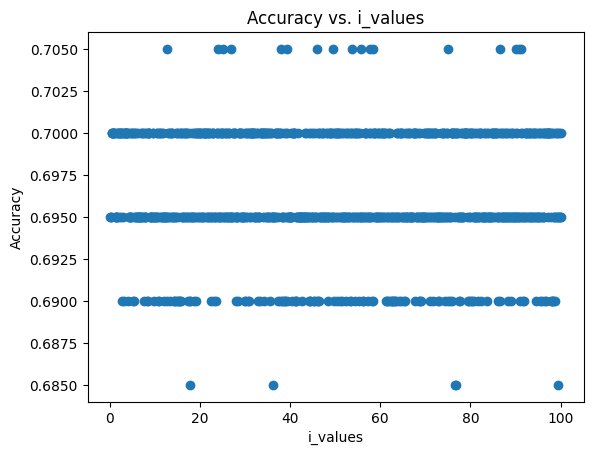

Accuracy: 0.705 With c:  12.69999999999997  by optimizer liblinear


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [104]:
Best_accuracy = -1
i = 0.1
types =['liblinear','newton-cg', 'sag','saga']

acc_Table_gen = []

i_table = []

for j in range(1001):
  #for t in types:
  logreg = LogisticRegression(C=i, solver = 'liblinear' ) # class_weight='balanced'

  # Fit the model to the training data
  logreg.fit(x_train, y_train)

  # Make predictions on the testing set
  y_pred = logreg.predict(x_val_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_val_test, y_pred)
  acc_Table_gen.append(accuracy)
  i_table.append(i)
  #print(i)
  if(Best_accuracy < accuracy):
    Best_accuracy = accuracy
    best_i = i
  i+= 0.1



# Plotting the data
plt.scatter(i_table, acc_Table_gen)

# Set the x-axis label and y-axis label
plt.xlabel('i_values')
plt.ylabel('Accuracy')

# Set the title of the plot
plt.title('Accuracy vs. i_values')

# Show the plot
plt.show()

#print("Accuracy:", Best_accuracy,"With c: ",best_i)


Results = []
for t in types:
  logreg = LogisticRegression( C=best_i, solver= t )
    # Fit the model to the training data
  logreg.fit(x_train, y_train)

  # Make predictions on the testing set
  y_pred = logreg.predict(x_val_test)

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_val_test, y_pred)
  Results.append(accuracy)
  if(Best_accuracy < accuracy):
    Best_accuracy = accuracy

print("Accuracy:", Best_accuracy,"With c: ",best_i," by optimizer", types[0])


# Preprocess the data if needed (e.g., handle missing values, scale numeric features, encode categorical variables)
# ...


In [105]:
# 1) initialize a logistic regression classifier with n_neighbors parameter set to best_k
logtest =  LogisticRegression(C= best_i, solver = 'liblinear' )
# 2) combine the training and validation sets (you may want to look up numpy.concatenate function for this)
X_Train = np.concatenate((x_train,x_val),axis=0)
Y_Train = np.concatenate((y_train,y_val),axis=0)
# 3) train the classifier using this set
logtest.fit(X_Train,Y_Train)
# 4) get the predictions of the classifier on the test set
test_predictions = logtest.predict(x_test) 
# 5) compute the accuracy of the predictions on the test set
test_accuracy = accuracy_score(y_test,test_predictions)
print('Test accuracy for i =', best_i, ' :', test_accuracy)

Test accuracy for i = 12.69999999999997  : 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


KNN

In [106]:
k_values = [1,3,5,7,9,11,13,15]
metrics = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

best_acc = -1 
best_k = None
best_metric = None
best_weight = None

for k in k_values:
  for m in metrics:
    for w in weights:
      # 1) initialize a k-NN classifier with n_neighbors parameter set to k
      knn = KNeighborsClassifier(n_neighbors=k, metric=m, weights=w)
      # 2) train the classifier using training set
      knn.fit(x_train, y_train)
      # 3) get the predictions of the classifier on the validation set 
      y_pred = knn.predict(x_val)
      # 4) compute the accuracy of the predictions on the validation set and append it to val_accs list
      accuracy = accuracy_score(y_val, y_pred)
      #val_accs.append(accuracy)
      print('Validation accuracy for k=', k, ' :', 'your validation accuracy: ', accuracy, " with metric = ", m, "with weight = ", w)
      # if validation accuracy is better than best_acc, update best_acc and best_k
      if(accuracy>best_acc):
        best_acc = accuracy
        best_k = k
        best_metric = m
        best_weight = w

print('Best validation accuracy (', best_acc, ') is achieved with k=', best_k, " with metric = ", m, "with weight = ", w)

Validation accuracy for k= 1  : your validation accuracy:  0.56  with metric =  euclidean with weight =  uniform
Validation accuracy for k= 1  : your validation accuracy:  0.56  with metric =  euclidean with weight =  distance
Validation accuracy for k= 1  : your validation accuracy:  0.56  with metric =  manhattan with weight =  uniform
Validation accuracy for k= 1  : your validation accuracy:  0.56  with metric =  manhattan with weight =  distance
Validation accuracy for k= 3  : your validation accuracy:  0.55  with metric =  euclidean with weight =  uniform
Validation accuracy for k= 3  : your validation accuracy:  0.57  with metric =  euclidean with weight =  distance
Validation accuracy for k= 3  : your validation accuracy:  0.53  with metric =  manhattan with weight =  uniform
Validation accuracy for k= 3  : your validation accuracy:  0.53  with metric =  manhattan with weight =  distance
Validation accuracy for k= 5  : your validation accuracy:  0.6  with metric =  euclidean wit

In [107]:
val_accs = [] 
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_val)
  accuracy = accuracy_score(y_val, y_pred)
  val_accs.append(accuracy)

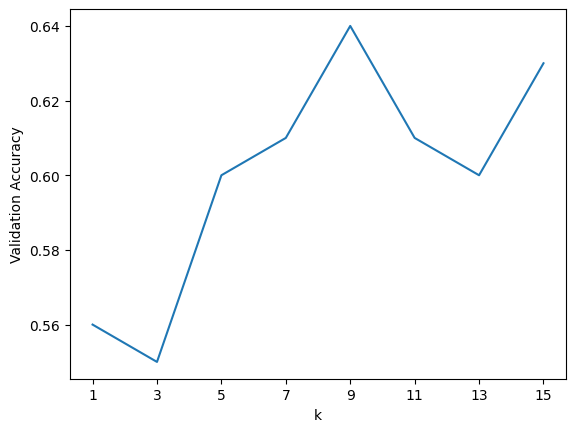

In [108]:
plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

In [109]:
# 1) initialize a k-NN classifier with n_neighbors parameter set to best_k
neigh = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights=best_weight)
# 2) combine the training and validation sets (you may want to look up numpy.concatenate function for this)
X_Train = np.concatenate((x_train,x_val),axis=0)
Y_Train = np.concatenate((y_train,y_val),axis=0)
# 3) train the classifier using this set
neigh.fit(X_Train,Y_Train)
# 4) get the predictions of the classifier on the test set
test_predictions = neigh.predict(x_test) 
# 5) compute the accuracy of the predictions on the test set
test_accuracy = accuracy_score(y_test,test_predictions)
print('Test accuracy for k=', best_k, ' :', test_accuracy)

# Report your result

Test accuracy for k= 15  : 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Decision Tree

In [110]:
#'max_depth': [None, 3, 5, 7],
#'criterion': ['gini', 'entropy'],
#'min_samples_leaf': [1, 3, 5],
max_depth = [ 3, 5, 7,9]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 3, 5]

In [111]:
# Creating a decision tree classifier object
best_accuracy = 0
best_depth = None
best_criterion = None
best_leaf = None
for depth in max_depth:
  for criter in criterion:
    for leaf in min_samples_leaf:
      clf = DecisionTreeClassifier(max_depth=depth, criterion=criter, min_samples_leaf=leaf)
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_val)
      accuracy = accuracy_score(y_val, y_pred)
      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        best_criterion = criter
        best_leaf = leaf
    
      print("Depth: ", depth, " - Criterion: ", criter, "- Leaf: ", leaf, " - Acc Score: ", accuracy)

print("Best accuracy: ", best_accuracy, " - Best depth: ", best_depth, " - Best criterion: ", criter, "Best min leaf: ", best_leaf)


Depth:  3  - Criterion:  gini - Leaf:  1  - Acc Score:  0.72
Depth:  3  - Criterion:  gini - Leaf:  3  - Acc Score:  0.72
Depth:  3  - Criterion:  gini - Leaf:  5  - Acc Score:  0.72
Depth:  3  - Criterion:  entropy - Leaf:  1  - Acc Score:  0.73
Depth:  3  - Criterion:  entropy - Leaf:  3  - Acc Score:  0.72
Depth:  3  - Criterion:  entropy - Leaf:  5  - Acc Score:  0.72
Depth:  5  - Criterion:  gini - Leaf:  1  - Acc Score:  0.7
Depth:  5  - Criterion:  gini - Leaf:  3  - Acc Score:  0.72
Depth:  5  - Criterion:  gini - Leaf:  5  - Acc Score:  0.73
Depth:  5  - Criterion:  entropy - Leaf:  1  - Acc Score:  0.67
Depth:  5  - Criterion:  entropy - Leaf:  3  - Acc Score:  0.67
Depth:  5  - Criterion:  entropy - Leaf:  5  - Acc Score:  0.68
Depth:  7  - Criterion:  gini - Leaf:  1  - Acc Score:  0.72
Depth:  7  - Criterion:  gini - Leaf:  3  - Acc Score:  0.73
Depth:  7  - Criterion:  gini - Leaf:  5  - Acc Score:  0.75
Depth:  7  - Criterion:  entropy - Leaf:  1  - Acc Score:  0.65
Dept

In [112]:
val_accs = [] 
for depth in max_depth :
  clf = DecisionTreeClassifier(max_depth=depth)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_val)
  accuracy = accuracy_score(y_val, y_pred)
  val_accs.append(accuracy)

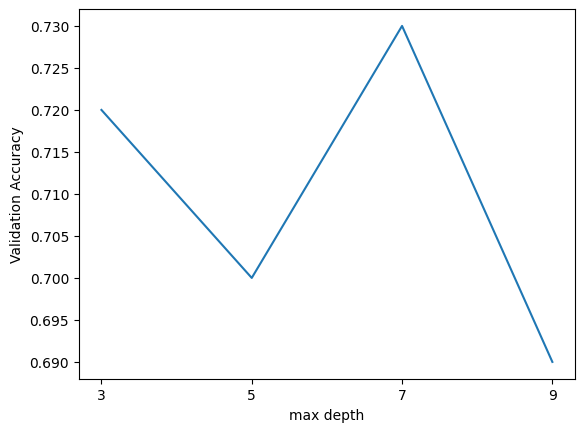

In [113]:
plt.plot(max_depth, val_accs)
plt.xticks(max_depth)
plt.xlabel('max depth')
plt.ylabel('Validation Accuracy')
plt.show()

In [114]:
# combine the training and validation sets (you may want to look up numpy.concatenate function for this)
X_Train = pd.concat([x_train,x_val],ignore_index=True)
Y_Train = pd.concat([y_train,y_val], ignore_index=True)

# train data
clf = DecisionTreeClassifier(max_depth=best_depth, criterion=best_criterion, min_samples_leaf=best_leaf)
clf.fit(X_Train, Y_Train)

# Making predictions on the test set with the best parameters
y_pred = clf.predict(x_test)

# Evaluating the accuracy of the classifier 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.64
